**Installing CatBoost Library**

In [ ]:
#Installing CatBoost Library
!pip install catboost

     |████████████████████████████████| 76.3 MB 1.2 MB/s 


**Importing Libraries**

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler #For Scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from catboost import Pool
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from IPython.display import display, Markdown, Latex
from imblearn.over_sampling import SMOTE  #For SMOTE oversampling
from sklearn.metrics import accuracy_score  #For Evaluation
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import hashlib

**Mounting google drive to read data.**

In [ ]:
# Mounting google drive to read data.
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/credit_risk_data/SBAnational.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


**Data Cleaning and Tansformation**

In [ ]:
# Let's read CSV and take a look at our data
# We drop unique ID and borrower's organization name right away as they are useless or even noisy as features;
# Also we drop ChgOffDate, ChgOffPrinGr because they can directly tell us that the loan is charged-off
# 'ApprovalDate', 'ApprovalFY', 'DisbursementDate' are dropped to make the model time-independent and these are things after the loan is approved.
data = pd.read_csv('/content/drive/MyDrive/credit_risk_data/SBAnational.csv').drop(columns=['LoanNr_ChkDgt', 'Name', 'ChgOffDate', 'ChgOffPrinGr',
                                                            'ApprovalDate', 'ApprovalFY', 'DisbursementDate'])
len_data = len(data)
data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,City,State,Zip,Bank,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,MIS_Status,GrAppv,SBA_Appv
0,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,84,4,2.0,0,0,1,0,N,Y,"$60,000.00",$0.00,P I F,"$60,000.00","$48,000.00"
1,NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,60,2,2.0,0,0,1,0,N,Y,"$40,000.00",$0.00,P I F,"$40,000.00","$32,000.00"
2,BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,180,7,1.0,0,0,1,0,N,N,"$287,000.00",$0.00,P I F,"$287,000.00","$215,250.00"
3,BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,60,2,1.0,0,0,1,0,N,Y,"$35,000.00",$0.00,P I F,"$35,000.00","$28,000.00"
4,ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,240,14,1.0,7,7,1,0,N,N,"$229,000.00",$0.00,P I F,"$229,000.00","$229,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,60,6,1.0,0,0,1,0,0,N,"$70,000.00",$0.00,P I F,"$70,000.00","$56,000.00"
899160,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,60,6,1.0,0,0,1,0,Y,N,"$85,000.00",$0.00,P I F,"$85,000.00","$42,500.00"
899161,SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,108,26,1.0,0,0,1,0,N,N,"$300,000.00",$0.00,P I F,"$300,000.00","$225,000.00"
899162,HONOLULU,HI,96830,BANK OF HAWAII,HI,0,60,6,1.0,0,0,1,0,N,Y,"$75,000.00",$0.00,CHGOFF,"$75,000.00","$60,000.00"


In [ ]:
# Let's convert the strings styled as '$XXXX.XX' to float values
money_cols = ['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']

for col in money_cols:
  data[col] = [float(val[1:].replace(',', '')) for val in data[col].values]

In [ ]:
data.head()

,City,State,Zip,Bank,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,MIS_Status,GrAppv,SBA_Appv
0,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,84,4,2.0,0,0,1,0,N,Y,60000.0,0.0,P I F,60000.0,48000.0
1,NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,60,2,2.0,0,0,1,0,N,Y,40000.0,0.0,P I F,40000.0,32000.0
2,BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,180,7,1.0,0,0,1,0,N,N,287000.0,0.0,P I F,287000.0,215250.0
3,BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,60,2,1.0,0,0,1,0,N,Y,35000.0,0.0,P I F,35000.0,28000.0
4,ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,240,14,1.0,7,7,1,0,N,N,229000.0,0.0,P I F,229000.0,229000.0


In [ ]:
#Checking for Null Values
data.isna().sum()

City                   30
State                  14
Zip                     0
Bank                 1559
BankState            1566
NAICS                   0
Term                    0
NoEmp                   0
NewExist              136
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr            4528
LowDoc               2582
DisbursementGross       0
BalanceGross            0
MIS_Status           1997
GrAppv                  0
SBA_Appv                0
dtype: int64

In [ ]:
for col in data.drop(columns=['MIS_Status']).columns:
  if data[col].isna().any():
    data[col] = data[col].fillna(data[col].mode().iloc[0])

In [ ]:
data.isna().sum()

City                    0
State                   0
Zip                     0
Bank                    0
BankState               0
NAICS                   0
Term                    0
NoEmp                   0
NewExist                0
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr               0
LowDoc                  0
DisbursementGross       0
BalanceGross            0
MIS_Status           1997
GrAppv                  0
SBA_Appv                0
dtype: int64

In [ ]:
#One Hot Encoding and hashing for categorical variables
cols_to_drop = []

for col in data.drop(columns=['MIS_Status']).columns:
  if data[col].dtype == 'object':
    print(f'Column {col} has {data[col].nunique()} values among {len_data}')

    if data[col].nunique() < 25:
      print(f'One-hot encoding of {col}')
      one_hot_cols = pd.get_dummies(data[col])
      for ohc in one_hot_cols.columns:
        data[col + '_' + ohc] = one_hot_cols[ohc]
    else:
      print(f'Hashing of {col}')
      data[col + '_hash'] = data[col].apply(lambda row: int(hashlib.sha1((col + "_" + str(row)).encode('utf-8')).hexdigest(), 16) % len_data)

    cols_to_drop.append(col)

Column City has 32581 values among 899164
Hashing of City
Column State has 51 values among 899164
Hashing of State
Column Bank has 5802 values among 899164
Hashing of Bank
Column BankState has 56 values among 899164
Hashing of BankState
Column RevLineCr has 18 values among 899164
One-hot encoding of RevLineCr
Column LowDoc has 8 values among 899164
One-hot encoding of LowDoc


In [ ]:
data

,City,State,Zip,Bank,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,MIS_Status,GrAppv,SBA_Appv,City_hash,State_hash,Bank_hash,BankState_hash,"RevLineCr_,",RevLineCr_-,RevLineCr_.,RevLineCr_0,RevLineCr_1,RevLineCr_2,RevLineCr_3,RevLineCr_4,RevLineCr_5,RevLineCr_7,RevLineCr_A,RevLineCr_C,RevLineCr_N,RevLineCr_Q,RevLineCr_R,RevLineCr_T,RevLineCr_Y,RevLineCr_`,LowDoc_0,LowDoc_1,LowDoc_A,LowDoc_C,LowDoc_N,LowDoc_R,LowDoc_S,LowDoc_Y
0,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,84,4,2.0,0,0,1,0,N,Y,60000.0,0.0,P I F,60000.0,48000.0,516891,257285,472792,679759,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,60,2,2.0,0,0,1,0,N,Y,40000.0,0.0,P I F,40000.0,32000.0,489420,257285,98094,678090,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,180,7,1.0,0,0,1,0,N,N,287000.0,0.0,P I F,287000.0,215250.0,139156,257285,871129,678090,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,60,2,1.0,0,0,1,0,N,Y,35000.0,0.0,P I F,35000.0,28000.0,428377,244284,265846,64579,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,240,14,1.0,7,7,1,0,N,N,229000.0,0.0,P I F,229000.0,229000.0,26459,312726,848798,220708,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,60,6,1.0,0,0,1,0,0,N,70000.0,0.0,P I F,70000.0,56000.0,95791,110708,408224,852912,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
899160,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,60,6,1.0,0,0,1,0,Y,N,85000.0,0.0,P I F,85000.0,42500.0,224796,110708,408224,852912,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
899161,SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,108,26,1.0,0,0,1,0,N,N,300000.0,0.0,P I F,300000.0,225000.0,126786,196413,412134,534307,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
899162,HONOLULU,HI,96830,BANK OF HAWAII,HI,0,60,6,1.0,0,0,1,0,N,Y,75000.0,0.0,CHGOFF,75000.0,60000.0,680371,537481,847670,547142,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
#Target column creation
data = data.drop(columns=cols_to_drop)

data['Defaulted'] = [1 if app == 'CHGOFF' else 0 for app in data.MIS_Status.values]
data = data.drop(columns=['MIS_Status'])

In [ ]:
data

,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,City_hash,State_hash,Bank_hash,BankState_hash,"RevLineCr_,",RevLineCr_-,RevLineCr_.,RevLineCr_0,RevLineCr_1,RevLineCr_2,RevLineCr_3,RevLineCr_4,RevLineCr_5,RevLineCr_7,RevLineCr_A,RevLineCr_C,RevLineCr_N,RevLineCr_Q,RevLineCr_R,RevLineCr_T,RevLineCr_Y,RevLineCr_`,LowDoc_0,LowDoc_1,LowDoc_A,LowDoc_C,LowDoc_N,LowDoc_R,LowDoc_S,LowDoc_Y,Defaulted
0,47711,451120,84,4,2.0,0,0,1,0,60000.0,0.0,60000.0,48000.0,516891,257285,472792,679759,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,46526,722410,60,2,2.0,0,0,1,0,40000.0,0.0,40000.0,32000.0,489420,257285,98094,678090,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,47401,621210,180,7,1.0,0,0,1,0,287000.0,0.0,287000.0,215250.0,139156,257285,871129,678090,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,74012,0,60,2,1.0,0,0,1,0,35000.0,0.0,35000.0,28000.0,428377,244284,265846,64579,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,32801,0,240,14,1.0,7,7,1,0,229000.0,0.0,229000.0,229000.0,26459,312726,848798,220708,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,43221,451120,60,6,1.0,0,0,1,0,70000.0,0.0,70000.0,56000.0,95791,110708,408224,852912,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
899160,43221,451130,60,6,1.0,0,0,1,0,85000.0,0.0,85000.0,42500.0,224796,110708,408224,852912,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
899161,93455,332321,108,26,1.0,0,0,1,0,300000.0,0.0,300000.0,225000.0,126786,196413,412134,534307,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
899162,96830,0,60,6,1.0,0,0,1,0,75000.0,0.0,75000.0,60000.0,680371,537481,847670,547142,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [ ]:
# Split df into X and y
y = data['Defaulted'].copy()
X = data.drop('Defaulted', axis=1).copy()

# Scale X with a standard scaler (so that values are between -1 and 1)
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
#To check for Data Imbalance
y.value_counts()

0    741606
1    157558
Name: Defaulted, dtype: int64

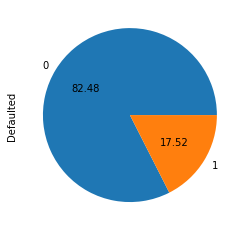

In [ ]:
# Show pie plot 
y.value_counts().plot.pie(autopct='%.2f')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

In [ ]:
X_train

,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,City_hash,State_hash,Bank_hash,BankState_hash,"RevLineCr_,",RevLineCr_-,RevLineCr_.,RevLineCr_0,RevLineCr_1,RevLineCr_2,RevLineCr_3,RevLineCr_4,RevLineCr_5,RevLineCr_7,RevLineCr_A,RevLineCr_C,RevLineCr_N,RevLineCr_Q,RevLineCr_R,RevLineCr_T,RevLineCr_Y,RevLineCr_`,LowDoc_0,LowDoc_1,LowDoc_A,LowDoc_C,LowDoc_N,LowDoc_R,LowDoc_S,LowDoc_Y
352233,-0.327038,0.857324,-0.643861,-0.086513,1.593077,-0.014493,-0.045535,-0.215764,0.374750,-0.612410,-0.002073,-0.591983,-0.599738,0.361434,-1.248419,2.053512,0.829883,-0.001055,-0.001055,-0.001055,-0.633659,-0.005058,-0.002583,-0.001055,-0.001055,-0.001055,-0.001055,-0.001055,-0.001491,-0.946350,-0.001055,-0.003946,7.604631,-0.537244,-0.003498,-0.040755,-0.001055,-0.023517,-0.029047,0.380582,-0.009133,-0.025905,-0.373995
401006,-0.657366,0.845172,2.475700,-0.140489,1.593077,-0.027168,-0.041318,-0.215843,1.921694,0.468800,-0.002073,0.505936,0.669446,-0.390702,-0.471727,-1.807369,1.134722,-0.001055,-0.001055,-0.001055,-0.633659,-0.005058,-0.002583,-0.001055,-0.001055,-0.001055,-0.001055,-0.001055,-0.001491,1.056691,-0.001055,-0.003946,-0.131499,-0.537244,-0.003498,-0.040755,-0.001055,-0.023517,-0.029047,0.380582,-0.009133,-0.025905,-0.373995
98222,1.012618,0.542880,-1.379367,-0.140489,-0.620641,-0.035618,-0.041318,-0.215764,0.374750,-0.356201,-0.002073,-0.556680,-0.577848,1.101663,-1.356431,-0.231902,0.581772,-0.001055,-0.001055,-0.001055,-0.633659,-0.005058,-0.002583,-0.001055,-0.001055,-0.001055,-0.001055,-0.001055,-0.001491,-0.946350,-0.001055,-0.003946,-0.131499,1.861353,-0.003498,-0.040755,-0.001055,-0.023517,-0.029047,0.380582,-0.009133,-0.025905,-0.373995
817806,-1.403899,-1.513990,-0.796034,-0.140489,-0.620641,-0.035618,-0.045535,-0.215764,-1.172195,-0.612410,-0.002073,-0.591983,-0.599738,1.096182,1.626289,0.022534,1.426236,-0.001055,-0.001055,-0.001055,1.578137,-0.005058,-0.002583,-0.001055,-0.001055,-0.001055,-0.001055,-0.001055,-0.001491,-0.946350,-0.001055,-0.003946,-0.131499,-0.537244,-0.003498,-0.040755,-0.001055,-0.023517,-0.029047,0.380582,-0.009133,-0.025905,-0.373995
563335,-1.354643,-0.619596,-1.379367,-0.140489,-0.620641,-0.014493,-0.020231,-0.215764,0.374750,-0.597635,-0.002073,-0.609634,-0.610683,1.024567,1.626289,-0.446223,-1.439583,-0.001055,-0.001055,-0.001055,-0.633659,-0.005058,-0.002583,-0.001055,-0.001055,-0.001055,-0.001055,-0.001055,-0.001491,-0.946350,-0.001055,-0.003946,-0.131499,1.861353,-0.003498,-0.040755,-0.001055,-0.023517,-0.029047,0.380582,-0.009133,-0.025905,-0.373995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192476,0.686875,1.570158,-0.339513,-0.100007,-0.620641,-0.018718,-0.011797,-0.215843,0.374750,-0.348887,-0.002073,-0.324387,-0.433811,0.370713,0.756171,0.022534,1.426236,-0.001055,-0.001055,-0.001055,-0.633659,-0.005058,-0.002583,-0.001055,-0.001055,-0.001055,-0.001055,-0.001055,-0.001491,1.056691,-0.001055,-0.003946,-0.131499,-0.537244,-0.003498,-0.040755,-0.001055,-0.023517,-0.029047,0.380582,-0.009133,-0.025905,-0.373995
17730,-0.613690,1.570989,-0.339513,-0.073020,-0.620641,-0.035618,-0.045535,-0.215764,0.374750,-0.612410,-0.002073,-0.591983,-0.599738,-0.836736,-0.471727,-1.418058,-0.694773,-0.001055,-0.001055,-0.001055,-0.633659,-0.005058,-0.002583,-0.001055,-0.001055,-0.001055,-0.001055,-0.001055,-0.001491,1.056691,-0.001055,-0.003946,-0.131499,-0.537244,-0.003498,-0.040755,-0.001055,-0.023517,-0.029047,0.380582,-0.009133,-0.025905,-0.373995
28030,-1.657425,1.228358,-0.364875,-0.100007,1.593077,-0.027168,-0.028666,-0.215764,0.374750,-0.226585,-0.002073,-0.565506,-0.583320,-0.430129,-0.258025,-0.446223,-1.430491,-0.001055,-0.001055,-0.001055,-0.633659,-0.005058,-0.002583,-0.001055,-0.001055,-0.001055,-0.001055,-0.001055,-0.001491,-0.946350,-0.001055,-0.003946,-0.131499,1.861353,-0.003498,-0.

In [ ]:
y_train

352233    0
401006    0
98222     1
817806    0
563335    0
         ..
192476    0
17730     0
28030     0
277869    0
773630    0
Name: Defaulted, Length: 629414, dtype: int64

In [ ]:
df = X_train
df.target = y_train

features = X_train
labels = y_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


**Feature Selection:**
We have used Six Different Feature Selection algorithm(Feed Forward, Weight of Evidence(WOE), Anova, Extra trees, Random forest, and L1 feature selection) combined using Voting Techniques(Unanimous, Majority, Hard-voting, Soft-voting, Any_Vote)

1. Weight of Evidence(WOE)

In [ ]:
# Implementataion of Weight of Evidence(WOE)

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv) 

In [ ]:
final_iv, IV = data_vars(df,df.target)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
IV = IV.rename(columns={'VAR_NAME':'index'})

In [ ]:
IV.sort_values(['IV'],ascending=0)

,index,IV
40,Term,1.352228e+00
38,SBA_Appv,3.132456e-01
7,GrAppv,2.588627e-01
5,DisbursementGross,1.737030e-01
19,RetainedJob,1.373456e-01
18,NoEmp,1.183980e-01
36,RevLineCr_Y,7.707820e-02
15,LowDoc_Y,6.109944e-02
12,LowDoc_N,5.951611e-02
16,NAICS,4.726346e-02


2. Random Forest Feature Selection

In [ ]:
#Implementation for Random Forest Feature Selection
clf = RandomForestClassifier()

clf.fit(features,labels)

preds = clf.predict(features)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(preds,labels)
print(accuracy)

0.999985700985361


In [ ]:
from pandas import DataFrame
VI = DataFrame(clf.feature_importances_, columns = ["RF"], index=features.columns)

In [ ]:
VI = VI.reset_index()

In [ ]:
VI.sort_values(['RF'],ascending=0)

,index,RF
2,Term,3.912312e-01
15,Bank_hash,6.343064e-02
0,Zip,5.762712e-02
12,SBA_Appv,5.562689e-02
9,DisbursementGross,4.981443e-02
16,BankState_hash,4.885506e-02
1,NAICS,4.739818e-02
11,GrAppv,4.385961e-02
13,City_hash,4.221487e-02
7,FranchiseCode,3.658524e-02


3. Feed Forward Feature Selection

In [ ]:
# Implementation of Feed Forward Feature Selection
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
sfs = SFS(model, n_features_to_select =25, direction="forward")
fit = sfs.fit(features, labels)

In [ ]:
from pandas import DataFrame
Selected = DataFrame(sfs.support_, columns = ["SFS"], index=features.columns)
Selected = Selected.reset_index()

In [ ]:
Selected

,index,SFS
0,Zip,True
1,NAICS,True
2,Term,True
3,NoEmp,True
4,NewExist,True
5,CreateJob,True
6,RetainedJob,True
7,FranchiseCode,True
8,UrbanRural,True
9,DisbursementGross,False


4. Extra Tree Feature Selection

In [ ]:
# Implementation of Extra Tree Feature Selection
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(features, labels)

print(model.feature_importances_)

[6.28217972e-02 4.97738113e-02 3.15781107e-01 4.18439810e-02
 1.00950609e-02 2.54834334e-02 2.91913987e-02 3.56867629e-02
 3.64656126e-02 5.29795772e-02 3.14495392e-06 5.07714608e-02
 5.30350310e-02 4.64175655e-02 3.67646471e-02 6.12216873e-02
 6.11750021e-02 2.49132461e-08 0.00000000e+00 0.00000000e+00
 5.90847451e-03 5.09839545e-06 1.82697290e-06 1.09426533e-09
 3.45169886e-08 4.69926659e-08 2.32025462e-07 0.00000000e+00
 1.43802154e-07 5.20769405e-03 3.74382357e-08 4.94294973e-06
 5.43833795e-03 6.47225410e-03 7.45093276e-07 8.00276103e-05
 8.64211765e-08 1.53393706e-04 8.54056595e-05 2.82574521e-03
 4.09662768e-05 2.81711914e-04 3.98168746e-03]


In [ ]:
from pandas import DataFrame
FI = DataFrame(model.feature_importances_, columns = ["Extratrees"], index=features.columns)

In [ ]:
FI = FI.reset_index()

In [ ]:
FI.sort_values(['Extratrees'],ascending=0)

,index,Extratrees
2,Term,3.157811e-01
0,Zip,6.282180e-02
15,Bank_hash,6.122169e-02
16,BankState_hash,6.117500e-02
12,SBA_Appv,5.303503e-02
9,DisbursementGross,5.297958e-02
11,GrAppv,5.077146e-02
1,NAICS,4.977381e-02
13,City_hash,4.641757e-02
3,NoEmp,4.184398e-02


In [ ]:
df1 = df.copy()

from sklearn import preprocessing
from collections import defaultdict
d = defaultdict(preprocessing.LabelEncoder)
# Encoding the categorical variable
fit = df1.apply(lambda x: d[x.name].fit_transform(x))

#Convert the categorical columns based on encoding
for i in list(d.keys()):
    df1[i] = d[i].transform(df1[i])

In [ ]:
features1 = df1
labels1 = y_train

5. Anova Feature Selection

In [ ]:
# Implementation of Anova Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

model = SelectKBest(score_func=f_classif, k=5)
fit = model.fit(features, labels)

In [ ]:
import numpy
numpy.set_printoptions(suppress=True)
print(fit.scores_)

[    1.96178462  7154.48096801 69103.78043267   487.80396315
   285.56291406    94.38306353    99.77468142   160.05848707
 16114.40719559  7796.79542401     0.64294304  9262.2568294
 11210.40484068     6.4260018     42.03009685  1988.56216031
   915.61929437     0.2130029      5.65509434     5.65509434
  1189.06710672     1.41381452     1.06502271     0.2130029
     0.2130029      0.2130029      0.2130029      5.65509434
     0.2130029   3632.71550114     0.2130029      2.13006595
  4856.07180396  7828.87567776     1.70404619   142.75825055
     0.2130029     40.82577837    25.32562741  4385.16861423
    13.43478593   180.63419808  4461.05741793]


In [ ]:
from pandas import DataFrame
pd.options.display.float_format = '{:.2f}'.format
anova = DataFrame(fit.scores_, columns = ["Anova"], index=features1.columns)

In [ ]:
anova = anova.reset_index()

In [ ]:
anova.sort_values('Anova',ascending=0)

,index,Anova
2,Term,69103.78
8,UrbanRural,16114.41
12,SBA_Appv,11210.40
11,GrAppv,9262.26
33,RevLineCr_Y,7828.88
9,DisbursementGross,7796.80
1,NAICS,7154.48
32,RevLineCr_T,4856.07
42,LowDoc_Y,4461.06
39,LowDoc_N,4385.17


6. L1 based Feature Selection

In [ ]:
# Implementation of L1 based Feature Selection
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

In [ ]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(features, labels)
model = SelectFromModel(lsvc,prefit=True)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
from pandas import DataFrame
l1 = DataFrame(model.get_support(), columns = ["L1"], index=features.columns)

In [ ]:
l1 = l1.reset_index()

In [ ]:
l1[l1['L1'] == True]

,index,L1
0,Zip,True
1,NAICS,True
2,Term,True
3,NoEmp,True
4,NewExist,True
5,CreateJob,True
6,RetainedJob,True
7,FranchiseCode,True
8,UrbanRural,True
9,DisbursementGross,True


**Voting mechanism for feature selection**

In [ ]:
# Implementing Voting mechanism for feature selection
#Combining outputs of individual feature selection methods
from functools import reduce
dfs = [IV, VI, Selected, FI, anova, l1]
final_results = reduce(lambda left,right: pd.merge(left,right,on='index'), dfs)

In [ ]:
final_results.head()

,index,IV,RF,SFS,Extratrees,Anova,L1
0,BalanceGross,0.00,0.00,True,0.00,0.64,True
1,BankState_hash,0.02,0.05,False,0.06,915.62,True
2,Bank_hash,0.00,0.06,True,0.06,1988.56,True
3,City_hash,0.00,0.04,False,0.05,6.43,True
4,CreateJob,0.01,0.02,True,0.03,94.38,True


In [ ]:
final_results.columns

Index(['index', 'IV', 'RF', 'SFS', 'Extratrees', 'Anova', 'L1'], dtype='object')

In [ ]:
#Changing the datatypes to be uniform accross all the columns and computing the final score column
columns = ['IV', 'RF', 'Extratrees', 'Anova']

score_table = pd.DataFrame({},[])
score_table['index'] = final_results['index']

for i in columns:
    score_table[i] = final_results['index'].isin(list(final_results.nlargest(20,i)['index'])).astype(int)
    
score_table['SFS'] = final_results['SFS'].astype(int)
score_table['L1'] = final_results['L1'].astype(int)

In [ ]:
score_table['final_score'] = score_table.sum(axis=1)

In [ ]:
score_table.sort_values('final_score',ascending=0)

,index,IV,RF,Extratrees,Anova,SFS,L1,final_score
16,NAICS,1,1,1,1,1,1,6
2,Bank_hash,1,1,1,1,1,1,6
35,RevLineCr_T,1,1,1,1,1,1,6
6,FranchiseCode,1,1,1,1,1,1,6
40,Term,1,1,1,1,1,1,6
36,RevLineCr_Y,1,1,1,1,1,1,6
19,RetainedJob,1,1,1,1,1,1,6
18,NoEmp,1,1,1,1,1,1,6
17,NewExist,1,1,1,1,1,1,6
38,SBA_Appv,1,1,1,1,0,1,5


In [ ]:
dfScore2 = score_table[score_table.final_score > 2]

In [ ]:
len(dfScore2)

24

In [ ]:
dfScore2["index"]

1        BankState_hash
2             Bank_hash
3             City_hash
4             CreateJob
5     DisbursementGross
6         FranchiseCode
7                GrAppv
8              LowDoc_0
12             LowDoc_N
14             LowDoc_S
15             LowDoc_Y
16                NAICS
17             NewExist
18                NoEmp
19          RetainedJob
23          RevLineCr_0
32          RevLineCr_N
35          RevLineCr_T
36          RevLineCr_Y
38             SBA_Appv
39           State_hash
40                 Term
41           UrbanRural
42                  Zip
Name: index, dtype: object

In [ ]:
X_train = X_train[dfScore2["index"]]
X_test = X_test[dfScore2["index"]]

In [ ]:
X_train

,BankState_hash,Bank_hash,City_hash,CreateJob,DisbursementGross,FranchiseCode,GrAppv,LowDoc_0,LowDoc_N,LowDoc_S,LowDoc_Y,NAICS,NewExist,NoEmp,RetainedJob,RevLineCr_0,RevLineCr_N,RevLineCr_T,RevLineCr_Y,SBA_Appv,State_hash,Term,UrbanRural,Zip
352233,0.83,2.05,0.36,-0.01,-0.61,-0.22,-0.59,-0.04,0.38,-0.03,-0.37,0.86,1.59,-0.09,-0.05,-0.63,-0.95,7.60,-0.54,-0.60,-1.25,-0.64,0.37,-0.33
401006,1.13,-1.81,-0.39,-0.03,0.47,-0.22,0.51,-0.04,0.38,-0.03,-0.37,0.85,1.59,-0.14,-0.04,-0.63,1.06,-0.13,-0.54,0.67,-0.47,2.48,1.92,-0.66
98222,0.58,-0.23,1.10,-0.04,-0.36,-0.22,-0.56,-0.04,0.38,-0.03,-0.37,0.54,-0.62,-0.14,-0.04,-0.63,-0.95,-0.13,1.86,-0.58,-1.36,-1.38,0.37,1.01
817806,1.43,0.02,1.10,-0.04,-0.61,-0.22,-0.59,-0.04,0.38,-0.03,-0.37,-1.51,-0.62,-0.14,-0.05,1.58,-0.95,-0.13,-0.54,-0.60,1.63,-0.80,-1.17,-1.40
563335,-1.44,-0.45,1.02,-0.01,-0.60,-0.22,-0.61,-0.04,0.38,-0.03,-0.37,-0.62,-0.62,-0.14,-0.02,-0.63,-0.95,-0.13,1.86,-0.61,1.63,-1.38,0.37,-1.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192476,1.43,0.02,0.37,-0.02,-0.35,-0.22,-0.32,-0.04,0.38,-0.03,-0.37,1.57,-0.62,-0.10,-0.01,-0.63,1.06,-0.13,-0.54,-0.43,0.76,-0.34,0.37,0.69
17730,-0.69,-1.42,-0.84,-0.04,-0.61,-0.22,-0.59,-0.04,0.38,-0.03,-0.37,1.57,-0.62,-0.07,-0.05,-0.63,1.06,-0.13,-0.54,-0.60,-0.47,-0.34,0.37,-0.61
28030,-1.43,-0.45,-0.43,-0.03,-0.23,-0.22,-0.57,-0.04,0.38,-0.03,-0.37,1.23,1.59,-0.10,-0.03,-0.63,-0.95,-0.13,1.86,-0.58,-0.26,-0.36,0.37,-1.66
277869,1.02,-0.49,0.13,-0.04,-0.42,-0.22,-0.40,-0.04,0.38,-0.03,-0.37,-0.32,1.59,-0.14,-0.04,1.58,-0.95,-0.13,-0.54,-0.48,0.95,-0.34,0.37,-0.75


SMOTE Oversampling Technique

In [ ]:
#Implementation of SMOTE for Data Balancing
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
X_test, y_test = oversample.fit_resample(X_test, y_test)

**Modelling**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:

## Hyper Parameter Optimization

params_xgb={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [ ]:
## Hyperparameter optimization using GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
classifier = XGBClassifier() 
random_search_xgb=RandomizedSearchCV(classifier,param_distributions=params_xgb,n_iter=5,scoring='roc_auc',n_jobs=-1,verbose=3, cv=2)
#grid_xgb = GridSearchCV(classifier, param_grid=params_xgb, verbose=1,cv=2, n_jobs=-1)

In [ ]:
random_search_xgb.fit(X_train,y_train)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


RandomizedSearchCV(cv=2, estimator=XGBClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [ ]:
random_search_xgb.best_estimator_

XGBClassifier(colsample_bytree=0.7, gamma=0.1, learning_rate=0.25, max_depth=8,
              min_child_weight=3)

In [ ]:
random_search.best_params_

{'colsample_bytree': 0.4,
 'gamma': 0.1,
 'learning_rate': 0.25,
 'max_depth': 8,
 'min_child_weight': 7}

**XGBoost**

In [ ]:
#Implementing XGBoost classifier with hyper-parameter tuning
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.2,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=25, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1) # Define classifier
xgb.fit(X_train, y_train) 

# Make predictions
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Training set performance
xgb_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
xgb_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
xgb_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
xgb_train_auc = roc_auc_score(y_train, y_train_pred)


# Test set performance
xgb_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
xgb_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
xgb_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
xgb_test_auc = roc_auc_score(y_test, y_test_pred)


print('Model performance for Training set')
print('- Accuracy: %s' % xgb_train_accuracy)
print('- MCC: %s' % xgb_train_mcc)
print('- F1 score: %s' % xgb_train_f1)
print('Train AUC: %.3f' % xgb_train_auc)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % xgb_test_accuracy)
print('- MCC: %s' % xgb_test_mcc)
print('- F1 score: %s' % xgb_test_f1)
print('Test AUC: %.3f' % xgb_test_auc)

Model performance for Training set
- Accuracy: 0.9453601830063848
- MCC: 0.8909759607159183
- F1 score: 0.945352345731232
Train AUC: 0.945
----------------------------------
Model performance for Test set
- Accuracy: 0.9448941930791094
- MCC: 0.8900332561608338
- F1 score: 0.9448866125989779
Test AUC: 0.945


In [ ]:
grid_params_lightgbm = {'learning_rate': [0.01], 'n_estimators': [8, 24],
                   'num_leaves': [6, 8, 12, 16], 'boosting_type': ['gbdt'], 
                   'objective': ['binary'], 'seed': [500],
                   'colsample_bytree': [0.65, 0.75, 0.8], 
                   'subsample': [0.7, 0.75], 'reg_alpha': [1, 2, 6],
                   'reg_lambda': [1, 2, 6]}

In [ ]:
classifier = LGBMClassifier()
grid = GridSearchCV(classifier, param_grid=grid_params_lightgbm, verbose=1, cv=2, n_jobs=-1)

In [ ]:
grid.fit(X_train,y_train)

Fitting 2 folds for each of 432 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 30.6min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 34.3min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=Tru...
             iid='deprecated', n_jobs=-1,
             param_grid={'boosting_type': ['gbdt'],
                         'colsample_bytree': [0.65, 0.75, 0.8],
                         'learning_rate': [0.01], 'n_estimators': [8, 24],
                         'num_leaves': [

In [ ]:
grid.best_estimator_

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.75,
               importance_type='split', learning_rate=0.01, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=8, n_jobs=-1, num_leaves=16, objective='binary',
               random_state=None, reg_alpha=1, reg_lambda=1, seed=500,
               silent=True, subsample=0.7, subsample_for_bin=200000,
               subsample_freq=0)

In [ ]:
grid.best_params_

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.75,
 'learning_rate': 0.01,
 'n_estimators': 8,
 'num_leaves': 16,
 'objective': 'binary',
 'reg_alpha': 1,
 'reg_lambda': 1,
 'seed': 500,
 'subsample': 0.7}

**LightGBM**

In [ ]:
#Implementing LGBM classifier with hyper-parameter tuning
lgbm = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.75,
               importance_type='split', learning_rate=0.1, max_depth=12,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=10, n_jobs=-1, num_leaves=500, objective='binary',
               random_state=None, reg_alpha=3, reg_lambda=3, seed=500,
               silent=True, subsample=0.7, subsample_for_bin=200000,
               subsample_freq=0)
lgbm.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = lgbm.predict(X_train)
y_test_pred = lgbm.predict(X_test)

# Training set performance
lgbm_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
lgbm_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
lgbm_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
auc_train = roc_auc_score(y_train, y_train_pred)

# Test set performance
lgbm_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
lgbm_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
lgbm_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
auc_test = roc_auc_score(y_test, y_test_pred)

print('Model performance for Training set')
print('- Accuracy: %s' % lgbm_train_accuracy)
print('- MCC: %s' % lgbm_train_mcc)
print('- F1 score: %s' % lgbm_train_f1)
print('Train AUC: %.3f' % auc_train)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % lgbm_test_accuracy)
print('- MCC: %s' % lgbm_test_mcc)
print('- F1 score: %s' % lgbm_test_f1)
print('Test AUC: %.3f' % auc_test)

Model performance for Training set
- Accuracy: 0.9520196034219265
- MCC: 0.9040935850273522
- F1 score: 0.952018160492317
Train AUC: 0.952
----------------------------------
Model performance for Test set
- Accuracy: 0.9508434470651095
- MCC: 0.9017316113109715
- F1 score: 0.9508422282199266
Test AUC: 0.951


In [ ]:
parameters = {'depth'         : [4,5,6,7,8,9, 10],
                 'learning_rate' : [0.01,0.02,0.03,0.04],
                  'iterations'    : [10, 20,30,40,50,60,70,80,90, 100]
                 }

In [ ]:
cat = CatBoostClassifier()
cat_grid = GridSearchCV(cat, param_grid=parameters, cv = 2, verbose=1, n_jobs=-1)

In [ ]:
cat_grid.fit(X_train,y_train)

Fitting 2 folds for each of 280 candidates, totalling 560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 52.5min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 132.2min
[Parallel(n_jobs=-1)]: Done 560 out of 560 | elapsed: 192.4min finished


0:	learn: 0.6441762	total: 891ms	remaining: 1m 28s
1:	learn: 0.6021141	total: 1.66s	remaining: 1m 21s
2:	learn: 0.5557864	total: 2.43s	remaining: 1m 18s
3:	learn: 0.5201484	total: 3.12s	remaining: 1m 14s
4:	learn: 0.4846031	total: 3.88s	remaining: 1m 13s
5:	learn: 0.4521650	total: 4.73s	remaining: 1m 14s
6:	learn: 0.4256956	total: 5.52s	remaining: 1m 13s
7:	learn: 0.4080914	total: 6.29s	remaining: 1m 12s
8:	learn: 0.3872024	total: 7.06s	remaining: 1m 11s
9:	learn: 0.3694472	total: 7.86s	remaining: 1m 10s
10:	learn: 0.3560053	total: 8.62s	remaining: 1m 9s
11:	learn: 0.3439599	total: 9.37s	remaining: 1m 8s
12:	learn: 0.3332338	total: 10.1s	remaining: 1m 7s
13:	learn: 0.3222476	total: 10.9s	remaining: 1m 7s
14:	learn: 0.3137379	total: 11.7s	remaining: 1m 6s
15:	learn: 0.3040199	total: 12.6s	remaining: 1m 5s
16:	learn: 0.2980803	total: 13.4s	remaining: 1m 5s
17:	learn: 0.2909167	total: 14.2s	remaining: 1m 4s
18:	learn: 0.2841323	total: 15.1s	remaining: 1m 4s
19:	learn: 0.2776577	total: 15.

GridSearchCV(cv=2, error_score=nan,
             estimator=<catboost.core.CatBoostClassifier object at 0x7fd00345f810>,
             iid='deprecated', n_jobs=-1,
             param_grid={'depth': [4, 5, 6, 7, 8, 9, 10],
                         'iterations': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                        100],
                         'learning_rate': [0.01, 0.02, 0.03, 0.04]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [ ]:
cat_grid.best_params_

{'depth': 10, 'iterations': 100, 'learning_rate': 0.04}

**CatBoost**

In [ ]:
#Implementing CatBoost classifier with hyper-parameter tuning
cat = CatBoostClassifier(depth= 10, iterations= 10, learning_rate= 0.4, loss_function='Logloss') # Define classifier
cat.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = cat.predict(X_train)
y_test_pred = cat.predict(X_test)

# Training set performance
cat_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
cat_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
cat_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
cat_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
cat_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
cat_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
auc_test = roc_auc_score(y_test, y_test_pred)

print('Model performance for Training set')
print('- Accuracy: %s' % cat_train_accuracy)
print('- MCC: %s' % cat_train_mcc)
print('- F1 score: %s' % cat_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % cat_test_accuracy)
print('- MCC: %s' % cat_test_mcc)
print('- F1 score: %s' % cat_test_f1)
print('Test AUC: %.3f' % auc_test)

0:	learn: 0.3797706	total: 703ms	remaining: 6.32s
1:	learn: 0.3061789	total: 1.31s	remaining: 5.26s
2:	learn: 0.2720580	total: 1.94s	remaining: 4.52s
3:	learn: 0.2477871	total: 2.55s	remaining: 3.83s
4:	learn: 0.2223366	total: 3.17s	remaining: 3.17s
5:	learn: 0.1960572	total: 3.78s	remaining: 2.52s
6:	learn: 0.1805218	total: 4.4s	remaining: 1.88s
7:	learn: 0.1711427	total: 5.01s	remaining: 1.25s
8:	learn: 0.1634915	total: 5.62s	remaining: 625ms
9:	learn: 0.1593612	total: 6.23s	remaining: 0us
Model performance for Training set
- Accuracy: 0.941264894804091
- MCC: 0.8825405136733921
- F1 score: 0.9412645379484632
----------------------------------
Model performance for Test set
- Accuracy: 0.9410799355235568
- MCC: 0.8821721481350256
- F1 score: 0.9410795255316902
Test AUC: 0.941


**Stacked Ensemble**

In [ ]:
 #Implementing Stacked ensemble model
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimator_list = [
    ('xgb',xgb),
    ('lgbm',lgbm),
    ('cat',cat) ]

# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LGBMClassifier(max_depth=5)
)

# Train stacked model
stack_model.fit(X_train, y_train)

# Make predictions
y_train_pred = stack_model.predict(X_train)
y_test_pred = stack_model.predict(X_test)

# Training set model performance
stack_model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
stack_model_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
stack_model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set model performance
stack_model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
stack_model_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
stack_model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
auc_test = roc_auc_score(y_test, y_test_pred)
print('Test AUC: %.3f' % auc_test)


print('Model performance for Training set')
print('- Accuracy: %s' % stack_model_train_accuracy)
print('- MCC: %s' % stack_model_train_mcc)
print('- F1 score: %s' % stack_model_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % stack_model_test_accuracy)
print('- MCC: %s' % stack_model_test_mcc)
print('- F1 score: %s' % stack_model_test_f1)

0:	learn: 0.3797706	total: 658ms	remaining: 5.92s
1:	learn: 0.3061789	total: 1.26s	remaining: 5.06s
2:	learn: 0.2720580	total: 1.88s	remaining: 4.4s
3:	learn: 0.2477871	total: 2.48s	remaining: 3.73s
4:	learn: 0.2223366	total: 3.1s	remaining: 3.1s
5:	learn: 0.1960572	total: 3.71s	remaining: 2.47s
6:	learn: 0.1805218	total: 4.31s	remaining: 1.85s
7:	learn: 0.1711427	total: 4.92s	remaining: 1.23s
8:	learn: 0.1634915	total: 5.54s	remaining: 615ms
9:	learn: 0.1593612	total: 6.15s	remaining: 0us
0:	learn: 0.3457333	total: 531ms	remaining: 4.78s
1:	learn: 0.2871532	total: 1.05s	remaining: 4.19s
2:	learn: 0.2452492	total: 1.53s	remaining: 3.58s
3:	learn: 0.2099541	total: 2.02s	remaining: 3.04s
4:	learn: 0.1967553	total: 2.52s	remaining: 2.52s
5:	learn: 0.1810500	total: 3.02s	remaining: 2.01s
6:	learn: 0.1562810	total: 3.5s	remaining: 1.5s
7:	learn: 0.1280304	total: 4.02s	remaining: 1s
8:	learn: 0.1170430	total: 4.51s	remaining: 501ms
9:	learn: 0.1020818	total: 5.02s	remaining: 0us
0:	learn: 0.